# Deep Neural Networks

## NN Architecture

We can combine linear functions of different weights, and a bias unit, to create quite complicated non-linear behavior. Once we have combined the two functions, we can apply the sigmoid "activation" function, to turn it into a probability.

![NNarchAddingNuerons.png](attachment:NNarchAddingNuerons.png)

Creating a NN arch can be done by merging the input of two nodes as follows

![Combine2NwithanotherNeuron.png](attachment:Combine2NwithanotherNeuron.png)

![combine3to1.png](attachment:combine3to1.png)

Can draw with the bias unit in or outside the node

![biasInOrOutNode.png](attachment:biasInOrOutNode.png)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

w1 = 2
w2 = 6
b = -2

# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

func = sigmoid(w1*0.4 + w2*0.6 + b)
print(func)

w1 = 3
w2 = 5
b = -2.2

func = sigmoid(w1*0.4 + w2*0.6 + b)
print(func)

w1 = 5
w2 = 4
b = -3

func = sigmoid(w1*0.4 + w2*0.6 + b)
print(func)


0.9168273035060777
0.8807970779778823
0.8021838885585818


If we have N Nodes means data living in N dimensional space. For example 3D from 3 nodes.

![3Dnn.png](attachment:3Dnn.png)

If we have more layers, we have a "deep" neutral network. For example for 3 outputs (3 classes, i.e. cat, dog, and bird, or duck, beaver, and walrus).

![DNNintro1.png](attachment:DNNintro1.png)

The layers, potentially non-linear layers, can combine to create even more non-linear boundaries.

![DNNintro2.png](attachment:DNNintro2.png)
![DNNintro3.png](attachment:DNNintro3.png)

Question: How many nodes in the output layer would you require if you were trying to classify all the letters in the English alphabet?

*26*


## Feedforward

Feedforward is the process neural networks use to turn the input into an output.

For two layers.

![feedForwardWithMatrices.png](attachment:feedForwardWithMatrices.png)

![multilayer%20feedforward.png](attachment:multilayer%20feedforward.png)

## Error Function for Feedforward in a NN

![ErrorFunctionForNN.png](attachment:ErrorFunctionForNN.png)

## Backpropagation

 In a nutshell, backpropagation will consist of:

* Doing a feedforward operation.
* Comparing the output of the model with the desired output.
* Calculating the error.
* Running the feedforward operation backwards (backpropagation) to spread the error to each of the weights.
* Use this to update the weights, and get a better model.
* Continue this until we have a model that is good.

![mtKillameerror.png](attachment:mtKillameerror.png)

If the point is mis-classified, then the point wants the line to come closer so it is inside the right region. If the point is correctly classified it wants the line to go further away so that it is even deeper in the right region.

![comeCloserAndFurtherAway.png](attachment:comeCloserAndFurtherAway.png)

![perceptronMath.png](attachment:perceptronMath.png)

To extend this to a multi layer perceptron

![multiLayerPerceptron.png](attachment:multiLayerPerceptron.png)

In matrix form, with the learning rate used to update the original weights, we get 

![MathForBackpropDNN.png](attachment:MathForBackpropDNN.png)

To get the partial deriviative we will need the chain rule. This is very useful because feedforward is composing a bunch of functions, and backpropagation is finding the derivative of each piece. Therefore we can multiply a bunch of partial deriviatives to get the full deriviative we need via the chasin rule.

![calculusChainRule.png](attachment:calculusChainRule.png)

We can cleanup the feedforward notation by having a function with superscript notation for the layer level. This allows us to define each layer in the network as follows

![feedForwardNotation.png](attachment:feedForwardNotation.png)

Using this approach, we can compute the deriviative of a rather complicated error function by multiplying 4 partial derivatives.

![backpropDerivatives.png](attachment:backpropDerivatives.png)

For one piece of the network, we can see that using the notation we developed for feedforward above, we are apply the backpropagation derivative approach to get.

![FFnotationPlusBPderivatives.png](attachment:FFnotationPlusBPderivatives.png)

This is all we need to train a layer in our neural network!

Recall the deriviative of the sigmoid function to use in backpropagation

![sigMoidDerivative.gif](attachment:sigMoidDerivative.gif)

## NN in Keras

There are lots of packages for NNs, including the following:

*    Keras
*    TensorFlow
*    Caffe
*    Theano
*    Scikit-learn
*    And many others!

In this course, we will learn Keras. 

In [1]:
from keras.models import Sequential

"""
The keras.models.Sequential class is a wrapper for the neural network model 
that treats the network as a sequence of layers. It implements the Keras model
interface with common methods like compile(), fit(), and evaluate() that are
used to train and run the model.
"""

#Create the Sequential model
model = Sequential()

"""
The Keras Layer class provides a common interface for a variety of standard 
neural network layers. There are fully connected layers, max pool layers, 
activation layers, and more. You can add a layer to a model using the model's 
add() method
"""

import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation

# X has shape (num_rows, num_cols), where the training data are stored
# as row vectors
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)

# y must have an output vector for each input vector
y = np.array([[0], [0], [0], [1]], dtype=np.float32)

# Create the Sequential model
model = Sequential()

# 1st Layer - Add an input layer of 32 nodes with the same input shape as
# the training samples in X
model.add(Dense(32, input_dim=X.shape[1]))

# Add a softmax activation layer
model.add(Activation('softmax'))

# 2nd Layer - Add a fully connected output layer
model.add(Dense(1))

# Add a sigmoid activation layer
model.add(Activation('sigmoid'))   
    

Using TensorFlow backend.


Keras requires the input shape to be specified in the first layer, but it will automatically infer the shape of all other layers. This means you only have to explicitly set the input dimensions for the first layer.

The first (hidden) layer from above, model.add(Dense(32, input_dim=X.shape[1])), creates 32 nodes which each expect to receive 2-element vectors as inputs. Each layer takes the outputs from the previous layer as inputs and pipes through to the next layer. This chain of passing output to the next layer continues until the last layer, which is the output of the model. We can see that the output has dimension 1.

The activation "layers" in Keras are equivalent to specifying an activation function in the Dense layers (e.g., model.add(Dense(128)); model.add(Activation('softmax')) is computationally equivalent to model.add(Dense(128, activation="softmax")))), but it is common to explicitly separate the activation layers because it allows direct access to the outputs of each layer before the activation is applied (which is useful in some model architectures).

Once we have our model built, we need to compile it before it can be run. Compiling the Keras model calls the backend (tensorflow, theano, etc.) and binds the optimizer, loss function, and other parameters required before the model can be run on any input data. We'll specify the loss function to be categorical_crossentropy which can be used when there are only two classes, and specify adam as the optimizer (which is a reasonable default when speed is a priority). And finally, we can specify what metrics we want to evaluate the model with. Here we'll use accuracy.



In [2]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics = ["accuracy"])

We can see the resulting model architecture with the following command:

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                96        
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


The model is trained with the fit() method, through the following command that specifies the number of training epochs and the message level (how much information we want displayed on the screen during training).

In [16]:
#model.fit(X, y, epochs=1000, verbose=0)

Note: In Keras 1, nb_epoch sets the number of epochs, but in Keras 2 this changes to the keyword epochs.

Finally, we can use the following command to evaluate the model:

In [17]:
#model.evaluate()

In [3]:
import numpy as np
from keras.utils import np_utils
import tensorflow as tf
#tf.python.control_flow_ops = tf

# Set random seed
np.random.seed(42)

# Our data
X = np.array([[0,0],[0,1],[1,0],[1,1]]).astype('float32')
y = np.array([[0],[1],[1],[0]]).astype('float32')

# Initial Setup for Keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten

# One-hot encoding the output
y = np_utils.to_categorical(y)

# Building the model
xor = Sequential()
xor.add(Dense(8, input_dim=2))
xor.add(Dense(8, input_dim=2))
xor.add(Activation("tanh"))
xor.add(Dense(2))
xor.add(Activation("sigmoid"))

xor.compile(loss="categorical_crossentropy", optimizer="adam", metrics = ['accuracy'])

# Uncomment this line to print the model architecture
xor.summary()

# Fitting the model
history = xor.fit(X, y, epochs=1000, verbose=0)

# Scoring the model
score = xor.evaluate(X, y)
print("\nAccuracy: ", score[-1])

# Checking the predictions
print("\nPredictions:")
print(xor.predict_proba(X))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 24        
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 72        
_________________________________________________________________
activation_3 (Activation)    (None, 8)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 18        
_________________________________________________________________
activation_4 (Activation)    (None, 2)                 0         
Total params: 114
Trainable params: 114
Non-trainable params: 0
_________________________________________________________________


InternalError: GPU sync failed

## Student Admissions with Keras

(see git repo, git clone https://github.com/udacity/deep-learning.git)

## Early Stopping

Learning how much to train without overfitting, look at some feedback on training and test sets.

![numEpochsAndOverfitting.png](attachment:numEpochsAndOverfitting.png)

![modelComplexityGraph.png](attachment:modelComplexityGraph.png)


## Regularization 

Which model is better? Even with a larger error, a model may be better due to its ability to generalize.

![whichModelIsBetter.png](attachment:whichModelIsBetter.png)

We can look for an activation function that is less sharp.

![smootherSigmoid.png](attachment:smootherSigmoid.png)

![theRegularizationSolutionLambda.png](attachment:theRegularizationSolutionLambda.png)

L1 tends to make sparse vectors. Good for feature selection.

L2 is normally better for training models.

![L2BetterForTraining.png](attachment:L2BetterForTraining.png)


## Dropout

Training the non-dominant arm, so to speak.

After the weights that get trained get all the fun. So randomly turn off some of the nodes and say YOU SHALL NOT PASS! This means that the rest of the network has to pick up the slack.

![dropoutDuringTraining.png](attachment:dropoutDuringTraining.png)

## Local Minimum

During gradient decent, we can get stuck in a local minimum in the multi-dimensional surface. What to do about that?

## Vanishing Gradient

Sigmoid function can have a derivative near zero at x apporachs positive or negative infinity, not good since the derivative is what tells us in what direction to move. 

![vanishingSigmoidDeriv.png](attachment:vanishingSigmoidDeriv.png)

The derivative of the error fucntion with respect to the wight was the product of all the deriviatves of the nodes corresponding to the path of the output. The product of small numbers is tiny, which means we make steps that are too tiny. How to fix it?

![productOfSmallDeriv.png](attachment:productOfSmallDeriv.png)

## Other Activation Functions

To get around the limitations of the sigmoid function is to use activation functions, such as

The Hyperbolic Tangent

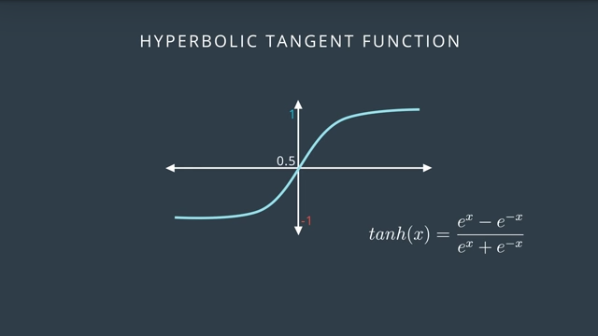

and...

The ReLU (Recified Linear Unit)

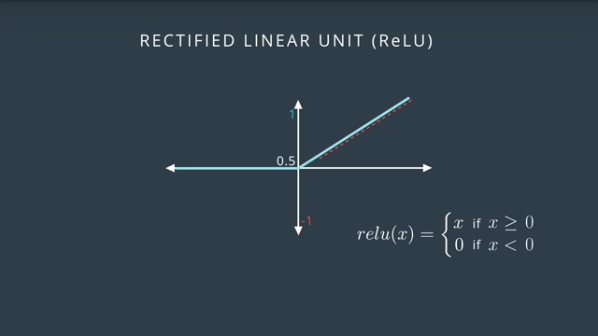

With better activation functions the derivatives of the weights will be larger and allow us to do better gradient decent.

For ReLU, if we want a value with can use a ReLU for the activation function, and if we want a probability we can use a sigmoid.


## Batch vs. Stochastic Gradient Decent

Take a bunch of steps down the mountain based on the negative of the gradient of the error function.

In each epoch we take all our data and take it through the whole NN. Run the network, then backprop the result to update the weights. Huge matrix computations that take lots of computing power.

Can we make this better?

Do we need to plug in all the data all the time? Stochastic gradient decent means we just to small amounts of data instead of all of it at once to reduce the size of the computing into managable "batches".

A lot of small steps with re-calibration for the error at each step can outperform a really big step, even though there isn't access to all the data at once. 

## Learning Rate Decay

If the learning rate is too big, can train well at the beginning, but miss the local minimum. If the steps are too small, the training is too slow.

A good rule of thumb, if the model is not working, decrease the learning rate. 

The best learning rates decrease as the model is getting closer to a solution. 

## Random Restarts

Start different random places and gradient decent from all of them.

## Momentum

Walk a bit fast with "momentum", so if one gets stuck in a hump, one can power through it and find a better result.

Previous step matters a lot, and the steps before that less and less. Basically a moving average to the beta^(history). This is just a simple way of having some memory of the types of steps that happened in the past. 

Works really well in practice.

## Keras Optimizers

http://ruder.io/optimizing-gradient-descent/index.html#rmsprop

https://keras.io/optimizers/

There are many optimizers in Keras, that we encourage you to explore further, in this link, or in this excellent blog post. These optimizers use a combination of the tricks above, plus a few others. Some of the most common are:

### SGD

This is Stochastic Gradient Descent. It uses the following parameters:

* Learning rate.
* Momentum (This takes the weighted average of the previous steps, in order to get a bit of momentum and go over bumps, as a way to not get stuck in local minima).
* Nesterov Momentum (This slows down the gradient when it's close to the solution).

### Adam

Adam (Adaptive Moment Estimation) uses a more complicated exponential decay that consists of not just considering the average (first moment), but also the variance (second moment) of the previous steps.
RMSProp

### RMSProp 

(RMS stands for Root Mean Squared Error) decreases the learning rate by dividing it by an exponentially decaying average of squared gradients


## NNs for Regression

We can use NNs. Just return the weighted sum of the output of previous layer to get a value, i.e. just remove the final activation function. For example

![NNregression.png](attachment:NNregression.png)

This is combinations of piece-wise linear functions.

## NN Playground

http://jalammar.github.io/visual-interactive-guide-basics-neural-networks/


## Mini Project: Analyze IMBD Movie Data with Keras

(see git repo, git clone https://github.com/udacity/deep-learning.git)
